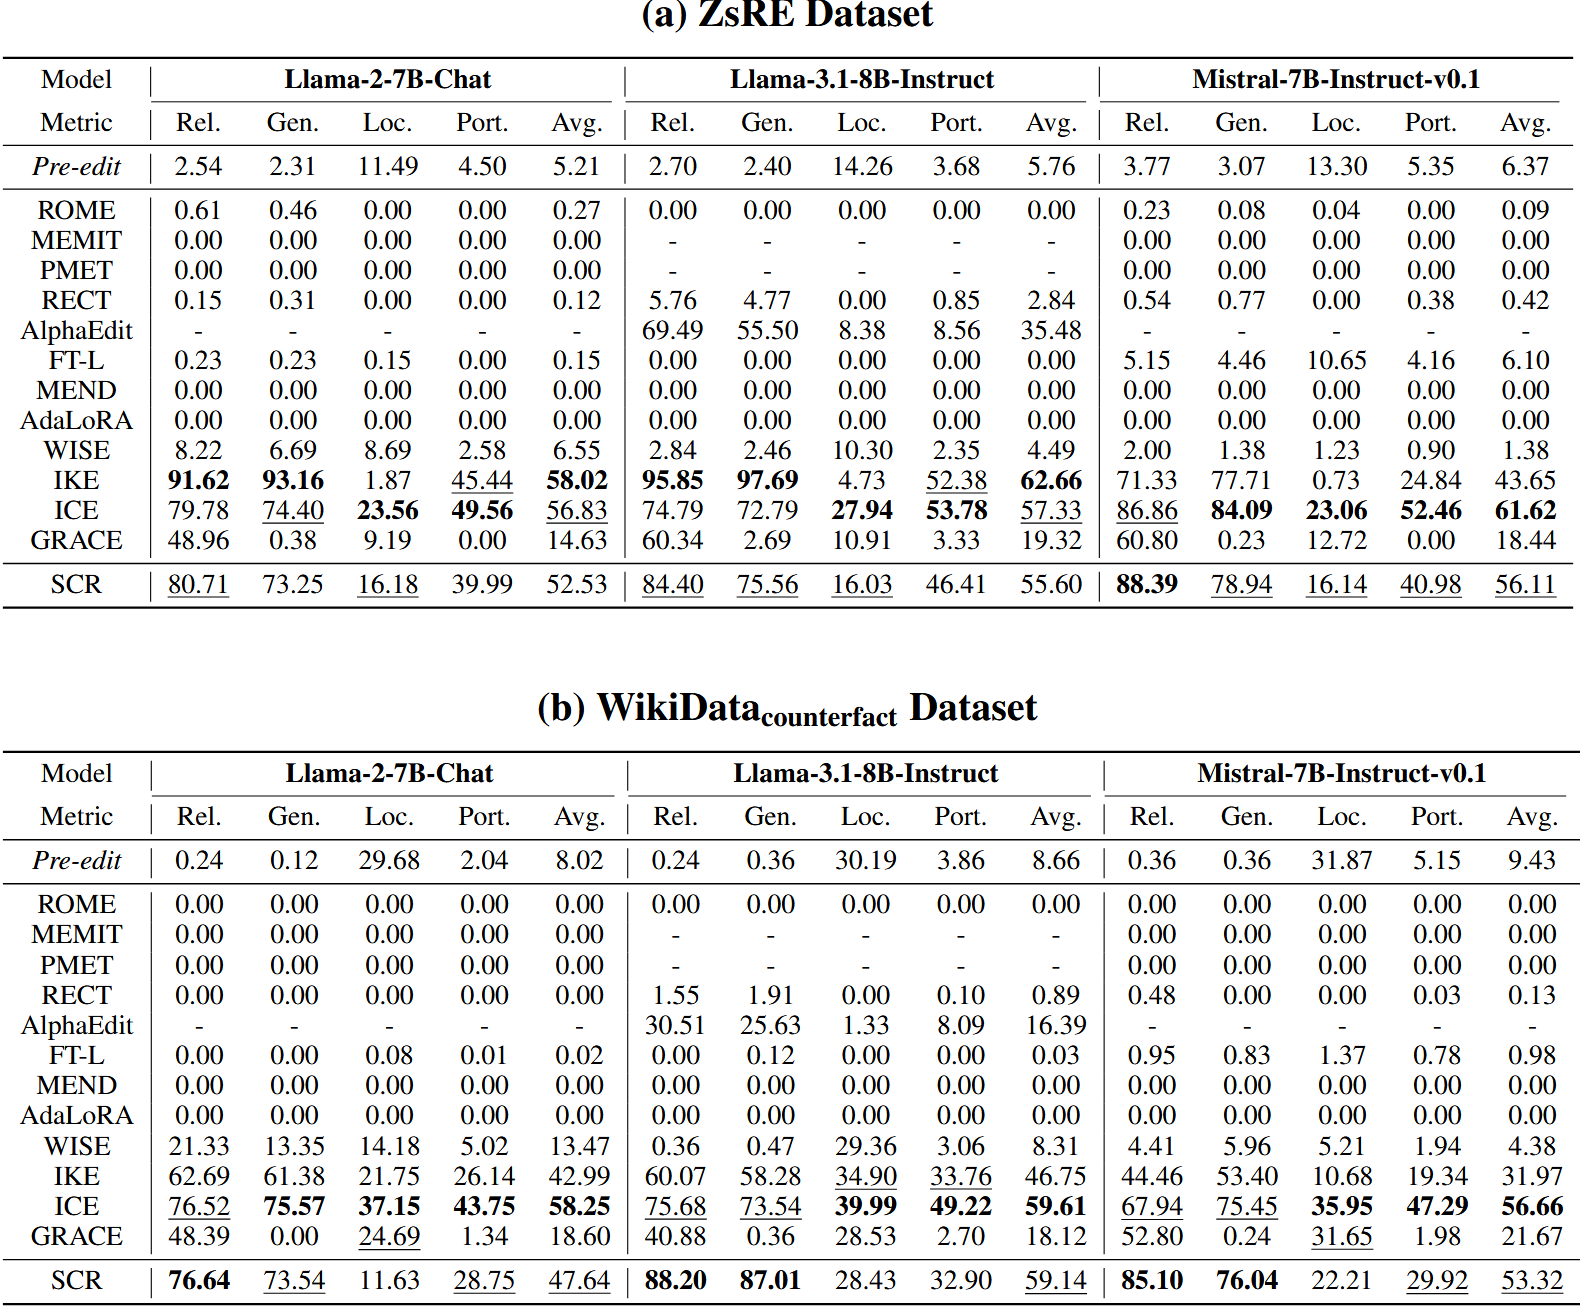

原来实现的方法：
locate-then-edit:
- ROME
- MEMIT
- PMET
- RECT
- AlphaEdit
- FT-L

meta-learning-based:
- MEND

additional-parameter-based:
- AdaLoRA
- WISE

in-context-learning-based:
- IKE
- ICE

external memory-based:
- GRACE

***
将要实现的方法：
locate-then-edit:
- 1SAKE
- 4KGMET（项目结构文件可能不完整No module named 'KGMET.AlphaEdit_main'）
- 5PRUNE（代码逻辑有问题：TypeError: __init__() missing 1 required positional argument: 'tok'）
- 6SimIE(11Wandb,Llama-2-7b没有config.json文件的问题)
- 9FastMEMIT
- 11HSE
- 12ETCON（还没见刊）

meta-learning-based:
- 7RLEdit(11wandb)

additional-parameter-based:
- 0MEMOIR
- 3MindBridge(8卡A100×)
- 8ELDER

in-context-learning-based:
- 2EditCoT

external memory-based:
- 

未分类：
- 10UnKE

- [ ] MEMOIR
- [ ] SAKE
- [ ] EditCoT
- [ ] MindBridge
- [ ] KGMET
- [ ] PRUNE
- [ ] SimIE
- [ ] RLEdit
- [ ] ELDER
- [ ] FastMEMIT
- [ ] UnKE 
- [ ] HSE
- [ ] EtCon

# 实验1：在ZsRE上


# 实验2：在WikiData_counterfact上


##### 下面是一些之前绘制表格的代码：

###### 实验1：在ZsRE数据集上的QA问答任务


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# 表格数据
methods = ['WISE', 'MEMOIR']

# 数据矩阵
data = [    
    # WISE
    [[1.00, 1.00, 1.00, '-'],
     [0.72, 0.72, 1.00, '-'],
     [0.57, 0.56, 0.99, '-'],
     [0.58, 0.57, 1.00, '-']],
    
    # MEMOIR
    [[1.00, 1.00,1.00, '-'],
     [0.96, 0.96, 1.00, '-'],
     [0.98, 0.93, 1.00, '-'],
     [0.94, 0.85, 1.00, '-']]
]

# 创建表格内容
table_data = []

# 添加表格行
for i, method in enumerate(methods):
    row = [method]
    for t in range(4):  # 4个T值
        for m in range(4):  # 4个指标: Rel., Gen., Loc., Avg.
            # row.append(f'{data[i][t][m]:.2f}')
            val = data[i][t][m]
            if isinstance(val, (int, float)):
                row.append(f'{val:.2f}')
            else:
                row.append(val)  # 直接添加字符串 '-'
    table_data.append(row)


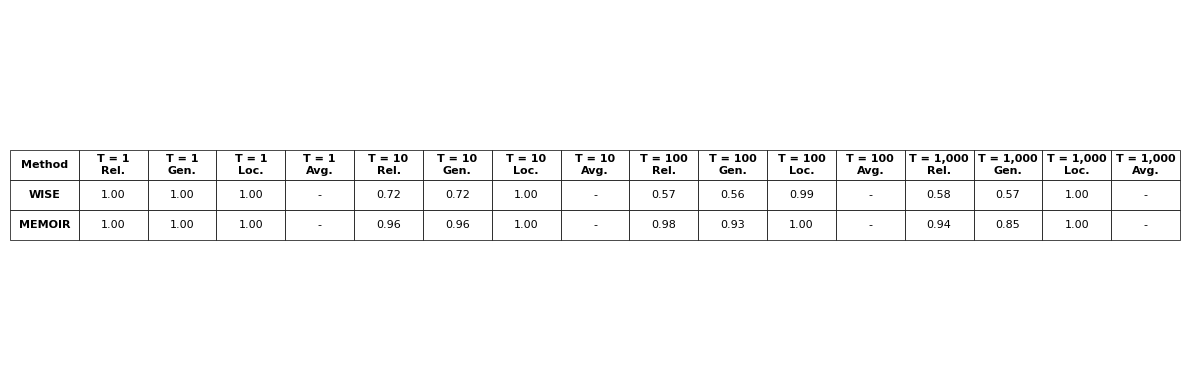

In [13]:

column_headers = ['Method']
metrics = ['Rel.', 'Gen.', 'Loc.', 'Avg.']

# 列标题
for T_label in ['T = 1', 'T = 10', 'T = 100', 'T = 1,000']:
    column_headers.extend([f'{T_label}\n{metric}' for metric in metrics])

fig, ax = plt.subplots(figsize=(12, 4))
ax.axis('tight')
ax.axis('off')

table = ax.table(cellText=table_data,
                 colLabels=column_headers,
                 cellLoc='center',
                 loc='center')

table.auto_set_font_size(False)
table.set_fontsize(8)  # 字体小一点
table.scale(1, 1.5)

# 设置所有单元格格式
for i in range(len(table_data) + 1):
    for j in range(len(column_headers)):
        cell = table[(i, j)]
        cell.set_edgecolor('black')
        cell.set_linewidth(0.5)
        if i == 0:  # 标题行
            cell.set_text_props(weight='bold')
        if j == 0:  # 方法列
            cell.set_text_props(weight='bold')

plt.tight_layout()
plt.savefig('simple_table.png', dpi=300, bbox_inches='tight')
plt.show()

wise

```python
CUDA_VISIBLE_DEVICES=4 python examples/run_wise_editing.py \
  --editing_method=WISE \
  --hparams_dir=./hparams/WISE/llama3-8b.yaml \
  --data_dir=./data \
  --ds_size=1 \
  --data_type=ZsRE \
  --sequential_edit \
> /home/wyren/MEMOIR/wyren/logs/run_wise_editing_zsre_1.log 2>&1

CUDA_VISIBLE_DEVICES=4 python examples/run_wise_editing.py \
  --editing_method=WISE \
  --hparams_dir=./hparams/WISE/llama3-8b.yaml \
  --data_dir=./data \
  --ds_size=10 \
  --data_type=ZsRE \
  --sequential_edit \
> /home/wyren/MEMOIR/wyren/logs/run_wise_editing_zsre_10.log 2>&1

CUDA_VISIBLE_DEVICES=4 python examples/run_wise_editing.py \
  --editing_method=WISE \
  --hparams_dir=./hparams/WISE/llama3-8b.yaml \
  --data_dir=./data \
  --ds_size=100 \
  --data_type=ZsRE \
  --sequential_edit \
> /home/wyren/MEMOIR/wyren/logs/run_wise_editing_zsre_100.log 2>&1

CUDA_VISIBLE_DEVICES=3 python examples/run_wise_editing.py \
  --editing_method=WISE \
  --hparams_dir=./hparams/WISE/llama3-8b.yaml \
  --data_dir=./data \
  --ds_size=1000 \
  --data_type=ZsRE \
  --sequential_edit \
> /home/wyren/MEMOIR/wyren/logs/run_wise_editing_zsre_1000.log 2>&1
```


MEMOIR

```bash
CUDA_VISIBLE_DEVICES=5 python examples/run_wise_editing.py \
  --editing_method=MEMOIR \
  --hparams_dir=./hparams/MEMOIR/llama3-8b.yaml \
  --data_dir=./data \
  --ds_size=1 \
  --data_type=ZsRE \
  --sequential_edit \
  --top_k=4096 \
  --irr_threshold=0.4 \
> /home/wyren/MEMOIR/wyren/logs/run_wise_editing_zsre_1.log 2>&1

CUDA_VISIBLE_DEVICES=2 python examples/run_wise_editing.py \
  --editing_method=MEMOIR \
  --hparams_dir=./hparams/MEMOIR/llama3-8b.yaml \
  --data_dir=./data \
  --ds_size=10 \
  --data_type=ZsRE \
  --sequential_edit \
  --top_k=4096 \
  --irr_threshold=0.4 \
> /home/wyren/MEMOIR/wyren/logs/run_wise_editing_zsre_10.log 2>&1

CUDA_VISIBLE_DEVICES=5 python examples/run_wise_editing.py \
  --editing_method=MEMOIR \
  --hparams_dir=./hparams/MEMOIR/llama3-8b.yaml \
  --data_dir=./data \
  --ds_size=100 \
  --data_type=ZsRE \
  --sequential_edit \
  --top_k=4096 \
  --irr_threshold=0.4 \
> /home/wyren/MEMOIR/wyren/logs/run_wise_editing_zsre_100.log 2>&1

CUDA_VISIBLE_DEVICES=2 python examples/run_wise_editing.py \
  --editing_method=MEMOIR \
  --hparams_dir=./hparams/MEMOIR/llama3-8b.yaml \
  --data_dir=./data \
  --ds_size=1000 \
  --data_type=ZsRE \
  --sequential_edit \
  --top_k=4096 \
  --irr_threshold=0.4 \
> /home/wyren/MEMOIR/wyren/logs/run_wise_editing_zsre_1000.log 2>&1
```

###### 实验2：SelfCheckGPT数据集上的幻觉修正任务
Hallucination correction task results on the SelfCheckGPT dataset. T denotes the number of edits. The reliability metric refers to perplexity, where smaller value indicates better performance. Due to large value ranges, we use scientific notation (e.g., 8.05e1 denotes 80.5) for clarity.

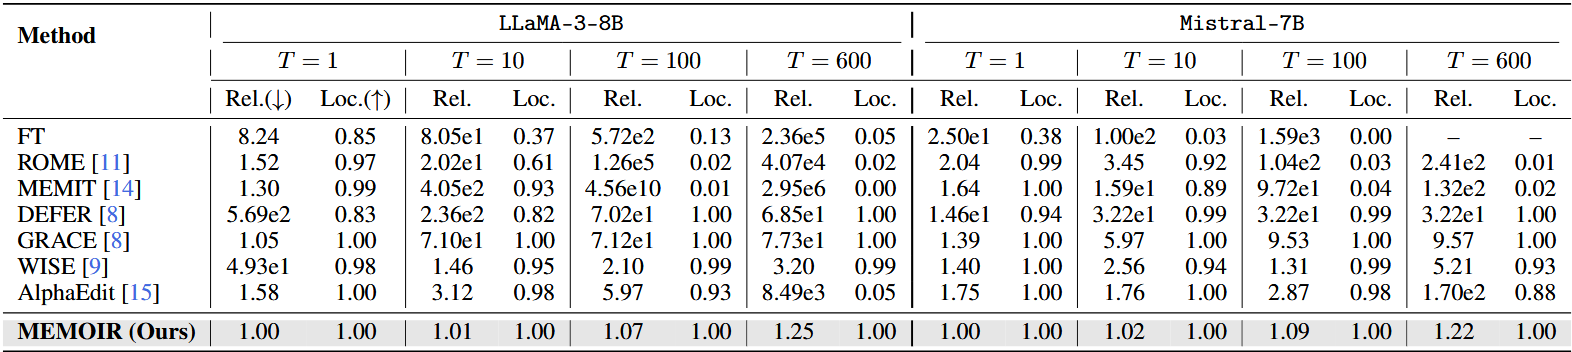

MEMOIR

```bash
CUDA_VISIBLE_DEVICES=0 python examples/run_wise_editing.py \
  --editing_method=MEMOIR \
  --hparams_dir=./hparams/MEMOIR/llama3-8b.yaml \
  --data_dir=./data \
  --ds_size=1 \
  --data_type=hallucination \
  --sequential_edit \
  --top_k=4096 \
  --irr_threshold=0.9 \
> /home/wyren/MEMOIR/wyren/logs/run_wise_editing_hallucination_1.log 2>&1

CUDA_VISIBLE_DEVICES=3 python examples/run_wise_editing.py \
  --editing_method=MEMOIR \
  --hparams_dir=./hparams/MEMOIR/llama3-8b.yaml \
  --data_dir=./data \
  --ds_size=10 \
  --data_type=hallucination \
  --sequential_edit \
  --top_k=4096 \
  --irr_threshold=0.9 \
> /home/wyren/MEMOIR/wyren/logs/run_wise_editing_hallucination_10.log 2>&1

CUDA_VISIBLE_DEVICES=0 python examples/run_wise_editing.py \
  --editing_method=MEMOIR \
  --hparams_dir=./hparams/MEMOIR/llama3-8b.yaml \
  --data_dir=./data \
  --ds_size=100 \
  --data_type=hallucination \
  --sequential_edit \
  --top_k=4096 \
  --irr_threshold=0.9 \
> /home/wyren/MEMOIR/wyren/logs/run_wise_editing_hallucination_100.log 2>&1

CUDA_VISIBLE_DEVICES=3 python examples/run_wise_editing.py \
  --editing_method=MEMOIR \
  --hparams_dir=./hparams/MEMOIR/llama3-8b.yaml \
  --data_dir=./data \
  --ds_size=600 \
  --data_type=hallucination \
  --sequential_edit \
  --top_k=4096 \
  --irr_threshold=0.9 \
> /home/wyren/MEMOIR/wyren/logs/run_wise_editing_hallucination_600.log 2>&1